In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Partie 1 : Calculs pour Marc

## Calcul de la proportion de personnes en état de sous-nutrition en 2017

### Création du DataFrame population et nombre de personnes en sous-nutrition pour l'année 2017

Comme indiqué par Julien dans ses notes, les **valeurs de personnes en état de sous nutrition sont exprimées en million**, pour la moyenne des 3 années, tandis que **la population par pays est exprimée en millier**. 

Pour 2017, on peut donc conserver la moyenne des années 2016, 2017 et 2018, soit la **tranche 2016-2018**.

In [2]:
# DataFrame du nombre de personnes en sous-nutrition par pays en 2017

sousNutrition = pd.read_csv("sous_nutrition.csv")

sousNutrition2017 = sousNutrition[sousNutrition["Année"] == "2016-2018"]

In [3]:
# DataFrame de la population mondiale en 2017

popMondiale = pd.read_csv("population.csv")

popMondialeParPays2017 = popMondiale[popMondiale["Année"] == 2017]

In [4]:
# Créer un DataFrame composé des populations et du nombre de personnes en sous-nutrition par pays en 2017

dfPopEtSousNutri = pd.merge(sousNutrition2017, popMondialeParPays2017, on="Zone", how="inner")

# Arrondir les valeurs <0.1 
dfPopEtSousNutri.loc[dfPopEtSousNutri["Valeur_x"] == "<0.1", "Valeur_x"] = 0

# Conserver et renommer les colonnes utiles
dfPopEtSousNutri = dfPopEtSousNutri[["Zone", "Valeur_x", "Valeur_y"]]
dfPopEtSousNutri = dfPopEtSousNutri.rename(columns={"Valeur_x": "Nombre personnes en sous-nutrition", \
                                                    "Valeur_y": "Population"})

# Traiter comme des valeur numériques
dfPopEtSousNutri["Nombre personnes en sous-nutrition"] = \
pd.to_numeric(dfPopEtSousNutri["Nombre personnes en sous-nutrition"]).fillna(0)


# Mettre les deux colonnes dans la même unité (nombre de personnes)
dfPopEtSousNutri["Nombre personnes en sous-nutrition"] *= 1000000
dfPopEtSousNutri["Population"] *= 1000

# Transformer le résultat en integer
dfPopEtSousNutri["Nombre personnes en sous-nutrition"] = dfPopEtSousNutri["Nombre personnes en sous-nutrition"].astype(int)
dfPopEtSousNutri["Population"] = dfPopEtSousNutri["Population"].astype(int)

display(dfPopEtSousNutri)

,Zone,Nombre personnes en sous-nutrition,Population
0,Afghanistan,10500000,36296113
1,Afrique du Sud,3100000,57009756
2,Albanie,100000,2884169
3,Algérie,1300000,41389189
4,Allemagne,0,82658409
...,...,...,...
198,Venezuela (République bolivarienne du),8000000,29402484
199,Viet Nam,6500000,94600648
200,Yémen,0,27834819
201,Zambie,0,16853599


### Calcul de la proportion de personnes en sous-nutrition en 2017

#### Calcul du nombre de personnes en sous-nutrition en 2017

In [5]:
nbPersSousNourrie2017 = dfPopEtSousNutri["Nombre personnes en sous-nutrition"].sum()

print("Nombre de personnes sous nourries dans le monde en 2017 = {:,.0f}".format(nbPersSousNourrie2017))

Nombre de personnes sous nourries dans le monde en 2017 = 535,700,000


#### Calcul de la population mondiale en 2017

In [6]:
popMondiale2017 = dfPopEtSousNutri["Population"].sum()

print("Population mondiale en 2017 = {:,.0f}".format(popMondiale2017))

Population mondiale en 2017 = 7,543,798,769


#### Calcul de la proportion de personnes en sous-nutrition en 2017

In [7]:
proportionSousNutrition2017 = nbPersSousNourrie2017 / popMondiale2017 * 100

print("Proportion de la population mondiale en sous nutrition en 2017 = {:,.2f}%".format(proportionSousNutrition2017))

Proportion de la population mondiale en sous nutrition en 2017 = 7.10%


### Représentation graphique de cette proportion

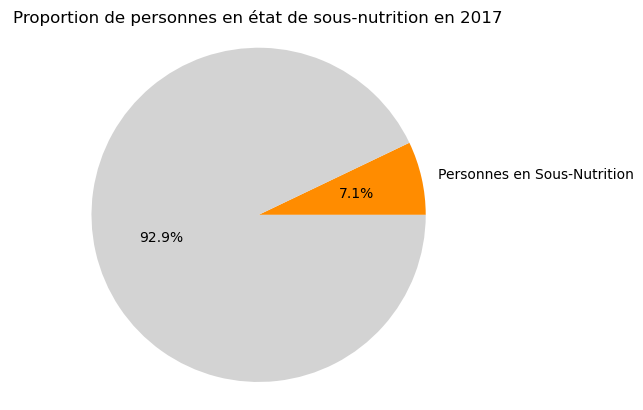

In [8]:
# Create a pie chart
labels = ['Personnes en Sous-Nutrition', '']
sizes = [proportionSousNutrition2017, 100 - proportionSousNutrition2017]
colors = ['#FF8C00', '#D3D3D3']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Proportion de personnes en état de sous-nutrition en 2017')

plt.show()

***

## Nombre théorique de personnes qui pourraient être nourries selon la disponibilité alimentaire mondiale

Calculer la disponibilité alimentaire en Kcal/jour/pers nous permet de savoir combien de personnes pourraient être théoriquement nourries par jour dans chaque pays. 

On partira pour se faire du principe **qu'un humain a besoin en moyenne de 2500 Kcal par jour**, ce chiffre pouvant en pratique varier selon la taille, l'âge, le poids, le sexe de chaque individu.

### Calcul de la disponibilité alimentaire pour chaque pays

In [9]:
# Calcul de la disponibilité alimentaire pour chaque pays

dispoAlimentaire = pd.read_csv("dispo_alimentaire.csv")

dispoParPays = dispoAlimentaire.groupby("Zone").sum()

dispoParPays = dispoParPays[["Disponibilité alimentaire (Kcal/personne/jour)"]]

display(dispoParPays)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


### Calcul du nombre de personnes théoriquement nourries par pays

In [10]:
habNourrisParPays = pd.DataFrame({'Nombre de personne théoriquement nourries': \
                       dispoParPays['Disponibilité alimentaire (Kcal/personne/jour)']/2500},
                     index = dispoParPays.index)

habNourrisParPays = habNourrisParPays.reset_index()

display(habNourrisParPays)

,Zone,Nombre de personne théoriquement nourries
0,Afghanistan,0.8348
1,Afrique du Sud,1.2080
2,Albanie,1.2752
3,Algérie,1.3172
4,Allemagne,1.4012
...,...,...
169,Émirats arabes unis,1.3100
170,Équateur,0.9384
171,États-Unis d'Amérique,1.4728
172,Éthiopie,0.8516


### Pondération des résultats par la population de chaque pays

In [11]:
# Ajouter la colonne population à notre dataframe. 

df_ponderation = pd.merge(habNourrisParPays, popMondialeParPays2017, on='Zone')

# Garder les colonnes utiles 

df_ponderation = df_ponderation[['Zone', 'Nombre de personne théoriquement nourries', 'Valeur']]

# Renommer la colonne Valeur en 'Population en millier d'habitants'

df_ponderation = df_ponderation.rename(columns={'Valeur' : "Population en millier d'habitants"})

display(df_ponderation)


,Zone,Nombre de personne théoriquement nourries,Population en millier d'habitants
0,Afghanistan,0.8348,36296.113
1,Afrique du Sud,1.2080,57009.756
2,Albanie,1.2752,2884.169
3,Algérie,1.3172,41389.189
4,Allemagne,1.4012,82658.409
...,...,...,...
167,Émirats arabes unis,1.3100,9487.203
168,Équateur,0.9384,16785.361
169,États-Unis d'Amérique,1.4728,325084.756
170,Éthiopie,0.8516,106399.924


In [12]:
# Calculer le coeficient de pondération

df_ponderation['Coeficient de Pondération'] = df_ponderation["Population en millier d'habitants"] / df_ponderation["Population en millier d'habitants"].sum()

display(df_ponderation)

,Zone,Nombre de personne théoriquement nourries,Population en millier d'habitants,Coeficient de Pondération
0,Afghanistan,0.8348,36296.113,0.004978
1,Afrique du Sud,1.2080,57009.756,0.007818
2,Albanie,1.2752,2884.169,0.000396
3,Algérie,1.3172,41389.189,0.005676
4,Allemagne,1.4012,82658.409,0.011336
...,...,...,...,...
167,Émirats arabes unis,1.3100,9487.203,0.001301
168,Équateur,0.9384,16785.361,0.002302
169,États-Unis d'Amérique,1.4728,325084.756,0.044582
170,Éthiopie,0.8516,106399.924,0.014592


### Nombre de personnes qui pourraient être théoriquement nourries à l'échelle mondiale

In [13]:
# Utiliser la fonction 'average' de numpy pour faire la moyenne pondérée ('weight')

values = df_ponderation['Nombre de personne théoriquement nourries']
weights = df_ponderation['Coeficient de Pondération']

moyennePonderee = np.average(values, weights = weights)

print("On pourrait nourrir {:,.4f} fois la population mondiale en 2017 (soit {:,.2f}%)"\
      .format(moyennePonderee, moyennePonderee*100))

On pourrait nourrir 1.1475 fois la population mondiale en 2017 (soit 114.75%)


In [14]:
nbPersTheoriquementNourriesMonde = float(popMondiale2017) * moyennePonderee

print("Le nombre de personnes que l'on pourrait théoriquement nourrir à l'échelle mondiale en 2017 est : {:,.0f}"\
      .format(nbPersTheoriquementNourriesMonde))

Le nombre de personnes que l'on pourrait théoriquement nourrir à l'échelle mondiale en 2017 est : 8,656,651,491


***

## Nombre de personnes qui pourraient être nourries uniquement avec des aliments d'origine végétale

### Calcul de la disponibilité alimentaire des produits d'originie végétale pour chaque pays

In [15]:
dispoVege = dispoAlimentaire.loc[dispoAlimentaire["Origine"] == "vegetale"]

dispoVegeParPays = dispoVege.groupby("Zone").sum()

dispoVegeParPays = dispoVegeParPays[["Disponibilité alimentaire (Kcal/personne/jour)"]]

display(dispoVegeParPays)


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
...,...
Émirats arabes unis,2718.0
Équateur,1732.0
États-Unis d'Amérique,2698.0


### Calcul du nombre de personnes théoriquement nourries par pays, uniquement avec des produits d'origine végétale

In [16]:
habNourrisParPaysVege = pd.DataFrame({"Nombre de personne théoriquement nourries Vege": \
                       dispoVegeParPays['Disponibilité alimentaire (Kcal/personne/jour)']/2500},
                     index = dispoVegeParPays.index)

habNourrisParPaysVege = habNourrisParPaysVege.reset_index()

display(habNourrisParPaysVege)

,Zone,Nombre de personne théoriquement nourries Vege
0,Afghanistan,0.7484
1,Afrique du Sud,1.0132
2,Albanie,0.8812
3,Algérie,1.1660
4,Allemagne,0.9844
...,...,...
169,Émirats arabes unis,1.0872
170,Équateur,0.6928
171,États-Unis d'Amérique,1.0792
172,Éthiopie,0.8020


### Pondération des résultats par la population de chaque pays

In [17]:
# Ajouter la colonne population à notre dataframe. 

df_ponderationVege = pd.merge(habNourrisParPaysVege, popMondialeParPays2017, on='Zone')

# Garder les colonnes utiles 

df_ponderationVege = df_ponderationVege[['Zone', 'Nombre de personne théoriquement nourries Vege', 'Valeur']]

# Renommer la colonne Valeur en 'Population en millier d'habitants'

df_ponderationVege = df_ponderationVege.rename(columns={'Valeur' : "Population en millier d'habitants"})

display(df_ponderationVege)


,Zone,Nombre de personne théoriquement nourries Vege,Population en millier d'habitants
0,Afghanistan,0.7484,36296.113
1,Afrique du Sud,1.0132,57009.756
2,Albanie,0.8812,2884.169
3,Algérie,1.1660,41389.189
4,Allemagne,0.9844,82658.409
...,...,...,...
167,Émirats arabes unis,1.0872,9487.203
168,Équateur,0.6928,16785.361
169,États-Unis d'Amérique,1.0792,325084.756
170,Éthiopie,0.8020,106399.924


In [18]:
# Calculer le coeficient de pondération

df_ponderationVege['Coeficient de Pondération'] = df_ponderationVege["Population en millier d'habitants"] / df_ponderationVege["Population en millier d'habitants"].sum()

display(df_ponderationVege)

,Zone,Nombre de personne théoriquement nourries Vege,Population en millier d'habitants,Coeficient de Pondération
0,Afghanistan,0.7484,36296.113,0.004978
1,Afrique du Sud,1.0132,57009.756,0.007818
2,Albanie,0.8812,2884.169,0.000396
3,Algérie,1.1660,41389.189,0.005676
4,Allemagne,0.9844,82658.409,0.011336
...,...,...,...,...
167,Émirats arabes unis,1.0872,9487.203,0.001301
168,Équateur,0.6928,16785.361,0.002302
169,États-Unis d'Amérique,1.0792,325084.756,0.044582
170,Éthiopie,0.8020,106399.924,0.014592


### Nombre de personnes qui pourraient être théoriquement nourries, uniquement à partir de la disponibilité alimentaire d'origine végétale

In [19]:
# Utiliser la fonction 'average' de numpy pour faire la moyenne pondérée ('weight')

values = df_ponderationVege['Nombre de personne théoriquement nourries Vege']
weights = df_ponderationVege['Coeficient de Pondération']

moyennePondereeVege = np.average(values, weights = weights)

print("On pourrait nourrir {:,.2f}% de la population mondiale en 2017, uniquement avec des produits\
 d'origine végétale".format(moyennePondereeVege*100))

On pourrait nourrir 94.68% de la population mondiale en 2017, uniquement avec des produits d'origine végétale


In [20]:
nbPersNourriesMondeVege = float(popMondiale2017) * moyennePondereeVege

print("Le nombre de personnes que l'on pourrait théoriquement nourrir à l'échelle mondiale en 2017, de cette manière\
 est : \n{:,.0f}".format(nbPersNourriesMondeVege))

Le nombre de personnes que l'on pourrait théoriquement nourrir à l'échelle mondiale en 2017, de cette manière est : 
7,142,814,191


***

## Proportion de la disponibilité intérieure en fonction de l'usage

Afin de mener à bien ce calcul il est nécessaire d'avoir à l'esprit les relations suivantes :
- **Disponibilité intérieure** = (Importations - Exportations) + Production + Évolutions des stocks
- **Nourriture** = Disponibilité intérieure - (Semences + Pertes + Aliments pour animaux + Autre utilisation + Traitements)
- **Disponibilité alimentaire** = Nourriture / Population

### Calcul de la disponibilité intérieure totale

In [21]:
dispoAlimentaire = pd.read_csv("dispo_alimentaire.csv")

dispoInterieure = dispoAlimentaire["Disponibilité intérieure"].sum()

print("La disponibilité intérieure totale est égale à : {:,.0f} milliers de tonnes".format(dispoInterieure))

La disponibilité intérieure totale est égale à : 9,848,994 milliers de tonnes


### Répartition de la disponibilité intérieure

#### Proportion de la disponibilité intérieure concrètement utilisée pour l'alimentation humaine

In [22]:
nourriture = dispoAlimentaire["Nourriture"].sum()
print ("Total de la disponibilité alimentaire utilisée comme nourriture : {:,.0f} milliers de tonnes".format(nourriture))

Total de la disponibilité alimentaire utilisée comme nourriture : 4,876,258 milliers de tonnes


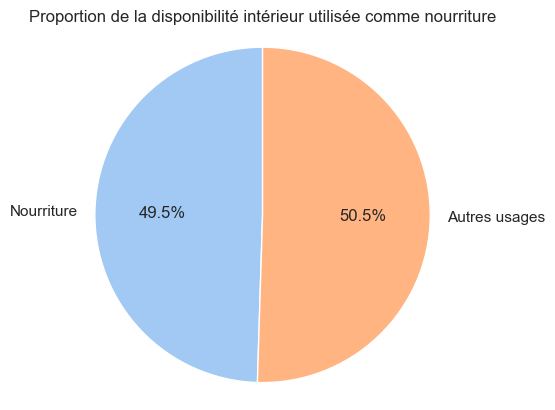

In [23]:
# Calcul de la proportion d'utilisation de la nourriture
proportionNourriture = (nourriture / dispoInterieure) * 100

dfTemp = pd.DataFrame({'value': [proportionNourriture, 100 - proportionNourriture]},
                  index=['Nourriture', 'Autres usages'])

sns.set_theme(style='whitegrid', palette='pastel')
fig, ax = plt.subplots()
ax.pie(dfTemp['value'], labels=dfTemp.index, autopct='%1.1f%%', startangle = 90)
ax.axis('equal')
ax.set_title('Proportion de la disponibilité intérieure utilisée comme nourriture')

plt.show()

#### Détail des proportions 

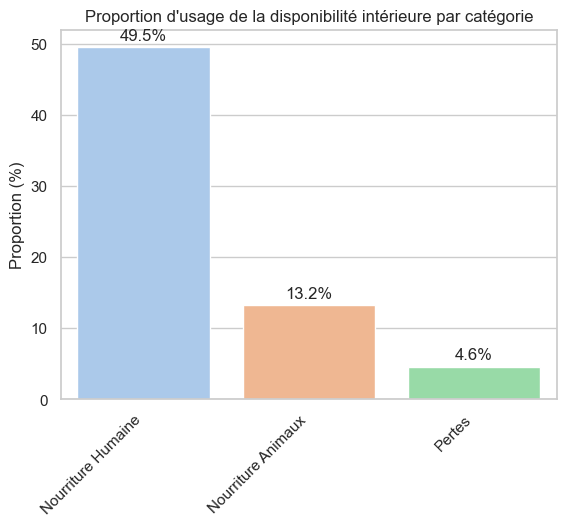

In [24]:
# Calcul des proportions

categories = ["Nourriture", "Aliments pour animaux", "Pertes"]

proportions = []
for cat in categories:
    proportion = (dispoAlimentaire[cat].sum() / dispoInterieure) * 100
    proportions.append(proportion)

dfProportions = pd.DataFrame({'value': proportions},
                  index=['Nourriture Humaine', 'Nourriture Animaux', 'Pertes'])


# Même données mais en version "bar"

sns.set_theme(style='whitegrid', palette='pastel')
fig, ax = plt.subplots()

sns.barplot(x=dfProportions.index, y=dfProportions['value'], ax=ax)

# Ajouter la valeur sur chaque bar
for i, v in enumerate(dfProportions['value']):
    ax.text(i, v + 1, '{:,.1f}%'.format(v), ha='center', fontsize=12)


ax.set_title("Proportion d'usage de la disponibilité intérieure par catégorie")
ax.set_ylabel("Proportion (%)")
plt.xticks(rotation=45, ha="right")

plt.show()


***

***

# Partie 2 : Questions de Julien

## Question 1 : Utilisation des céréales pour l'alimentation animale, par rapport à l'alimentation humaine

>"Lors de mes recherches, j’ai découvert des chiffres intéressants sur l’utilisation des céréales,
notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation
pour animaux. La liste des céréales peut être trouvée en allant fouiller un peu dans l’onglet
Bilans alimentaires, sur le lien juste ci-dessus. Peux-tu approfondir ce point ?"

### Proportion en pourcentage de céréales utilisées pour l'alimentation humaines et l'alimentation animale

In [25]:
cereales2 = ['Blé','Riz','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']

# Filtrer les lignes contenant une céréale dans la colonne "Produit"
dfCereales2 = dispoAlimentaire.loc[dispoAlimentaire['Produit'].isin(cereales2),:]

display(dfCereales2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,Îles Salomon,Blé,vegetale,NaN,NaN,184.0,25.37,1.00,5.19,14.0,0.0,14.0,14.0,NaN,NaN,NaN,NaN,0.0
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,NaN,NaN,1.0,0.15,0.01,0.03,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,NaN,NaN,0.0,0.07,NaN,0.01,1.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN


In [26]:
proportionAnimaux = dfCereales2["Aliments pour animaux"].sum()/dfCereales2["Disponibilité intérieure"].sum()*100
print("Proportion d'alimentation animale : {:.2f}%".format(proportionAnimaux))

proportionHumain = dfCereales2["Nourriture"].sum()/dfCereales2["Disponibilité intérieure"].sum()*100
print("Proportion d'alimentation humaine : {:.2f}%".format(proportionHumain))

Proportion d'alimentation animale : 43.49%
Proportion d'alimentation humaine : 33.74%


### Répartition selon les céréales

In [27]:
# Calcul de la quantité, pour chaque céréale, utilisée pour l'alimentation animale et pour l'alimentation humaine.

dfCereales2 = dfCereales2[["Produit", "Aliments pour animaux", "Nourriture"]]

dfCereales2 = dfCereales2.groupby(dfCereales2["Produit"]).sum()

# Ajout d'une colonne "Proportion (%)" représentant la part affectée à l'alimentation animale.

dfCereales2["Proportion d'usage pour les animaux par rapport à la nourriture (%)"] = \
dfCereales2["Aliments pour animaux"] / (dfCereales2["Aliments pour animaux"] + dfCereales2["Nourriture"]) * 100

dfCereales2 = dfCereales2.sort_values("Proportion d'usage pour les animaux par rapport à la nourriture (%)", ascending=False)

dfCereales2 = dfCereales2.reset_index().head(9)

display(dfCereales2)

,Produit,Aliments pour animaux,Nourriture,Proportion d'usage pour les animaux par rapport à la nourriture (%)
0,Orge,92658.0,6794.0,93.168564
1,Maïs,546116.0,125184.0,81.352004
2,Avoine,16251.0,3903.0,80.634117
3,"Céréales, Autres",19035.0,5324.0,78.143602
4,Seigle,8099.0,5502.0,59.547092
5,Sorgho,24808.0,24153.0,50.668900
6,Blé,129668.0,457824.0,22.071449
7,Millet,3306.0,23040.0,12.548394


On constate que **l'Orge, le Maïs et l'Avoine sont principalement utilisés pour l'alimentation animale**,
tandis que **le Blé, le Millet et le Riz sont principalement utilisés pour l'alimentation humaine**.

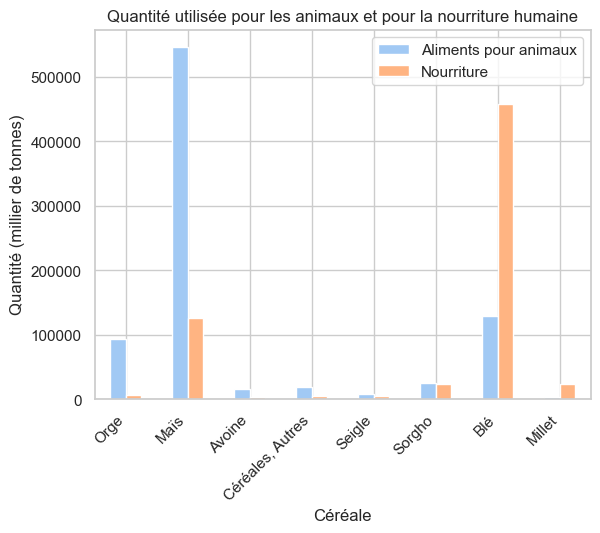

In [28]:
# Creation d'un graphique en barres 
ax = dfCereales2.plot(x='Produit', y=['Aliments pour animaux', 'Nourriture'], kind='bar')

# Titre et noms des axes
sns.set_theme(style='whitegrid', palette='pastel')
ax.set_title('Quantité utilisée pour les animaux et pour la nourriture humaine')
ax.set_xlabel('Céréale')
ax.set_ylabel('Quantité (millier de tonnes)')
plt.xticks(rotation=45, ha="right")

plt.show()

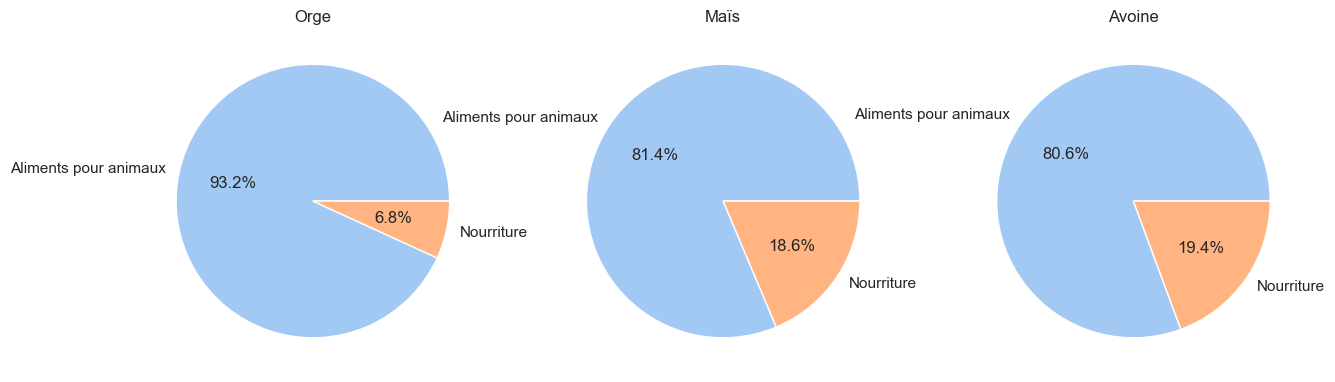

In [29]:
cereals = ["Orge", "Maïs", "Avoine"]
df_cereals = dfCereales2[dfCereales2["Produit"].isin(cereals)]

# Extraire les valeurs pour chaque céréale
cereals_data = df_cereals.groupby("Produit")[["Aliments pour animaux", "Nourriture"]].sum()

# Créer un graphique à 3 colonnes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Créer un graphique pour chacune des 3 céréales les plus utilisées pour l'alimentation animale
for i, cereal in enumerate(cereals):
    axs[i].pie(cereals_data.loc[cereal], labels=["Aliments pour animaux", "Nourriture"], autopct="%1.1f%%")
    axs[i].set_title(cereal)

# Display the plot
plt.show()

## Question 2 : Export du manioc par la Thaïlande

>"Je me souviens d’un exemple étonnant d’utilisation du manioc par la Thaïlande aux
égards de la proportion de personnes en sous-nutrition. De mémoire ça concernait
l’exportation par rapport à la production… Peux-tu jeter un coup d’oeil et nous faire un retour
?"

La Thaïlande est un pays où la **sous-nutrition** touche **plus de 6 millions de personnes**, soit **8.96% de la population**.

In [30]:
sousNutritionThailande = dfPopEtSousNutri[dfPopEtSousNutri["Zone"] == "Thaïlande"]
sousNutritionThailande = sousNutritionThailande.copy()
sousNutritionThailande['Proportion (%)'] = sousNutritionThailande['Nombre personnes en sous-nutrition'] / sousNutritionThailande['Population'] * 100
display(sousNutritionThailande)

,Zone,Nombre personnes en sous-nutrition,Population,Proportion (%)
185,Thaïlande,6200000,69209810,8.958268


### Proportion de manioc exporté par la Thaïlande par rapport à sa production

Pourtant **la Thaïlande exporte la majeure partie de sa production de Manioc**.

In [31]:
maniocGate = dispoAlimentaire[(dispoAlimentaire["Zone"]=="Thaïlande") & (dispoAlimentaire["Produit"].str.contains("Manioc"))]

maniocGate = maniocGate[["Zone", "Produit", "Disponibilité intérieure", "Exportations - Quantité", "Importations - Quantité", "Nourriture", "Pertes", "Production"]]

display(maniocGate)

,Zone,Produit,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production
13809,Thaïlande,Manioc,6264.0,25214.0,1250.0,871.0,1511.0,30228.0


In [32]:
export = maniocGate["Exportations - Quantité"].sum()
production = maniocGate["Production"].sum()
nourriture = maniocGate["Nourriture"].sum()

proportionExport = (export / production) * 100
proportionNourriture  = (nourriture / production) * 100

print("Proportion de manioc exporté : {:,.2f}%".format(proportionExport))
print("Proportion de manioc utilisée pour l'alimentation : {:,.2f}%".format(proportionNourriture))

Proportion de manioc exporté : 83.41%
Proportion de manioc utilisée pour l'alimentation : 2.88%


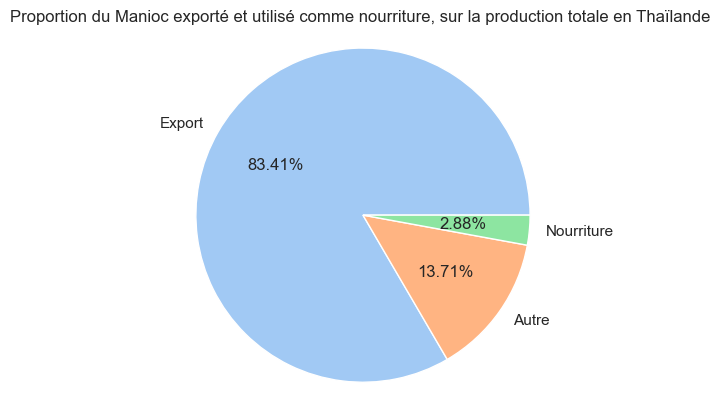

In [33]:
# Création d'un graphique pour visualiser les résultats

dfManioc = pd.DataFrame({'value': [proportionExport, 100 - proportionExport - proportionNourriture, proportionNourriture]},
                  index=['Export', 'Autre', 'Nourriture'])

sns.set_theme(style='whitegrid', palette='pastel')
fig, ax = plt.subplots()
ax.pie(dfManioc['value'], labels=dfManioc.index, autopct='%1.2f%%')
ax.axis('equal')
ax.set_title('Proportion du Manioc exporté et utilisé comme nourriture, sur la production totale en Thaïlande ')

plt.show()

***

***

# Partie 3 : Recherches spécifiques pour Mélanie

## Les 10 Pays où la proportion personnes sous-alimentées est la plus élevée en 2017

In [34]:
dfPopEtSousNutri['Proportion'] = dfPopEtSousNutri['Nombre personnes en sous-nutrition'] / dfPopEtSousNutri['Population']

dfPopEtSousNutri_sorted = dfPopEtSousNutri.sort_values('Proportion', ascending=False)

dfPopEtSousNutri_sorted = dfPopEtSousNutri_sorted[["Zone", "Proportion"]].head(10)

display(dfPopEtSousNutri_sorted)

,Zone,Proportion
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


## Les 10 Pays ayant le plus bénéficié de l'aide depuis 2013

In [35]:
aideAlimentaire = pd.read_csv("aide_alimentaire.csv")

aideAlimentaireParPays = aideAlimentaire.groupby("Pays bénéficiaire").sum()

aideAlimentaireParPays_sorted = aideAlimentaireParPays.sort_values('Valeur', ascending=False)

aideAlimentaireParPays_sorted = aideAlimentaireParPays_sorted[["Valeur"]].head(10)

aideAlimentaireParPays_sorted = aideAlimentaireParPays_sorted.rename(columns={"Valeur" : "Quantité (tonnes)"})

display(aideAlimentaireParPays_sorted)

,Quantité (tonnes)
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


## Disponibilité par habitant

### Pays ayant le plus de disponibilité par habitant

In [36]:
topDispoParPays = dispoParPays.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False).head(10).reset_index()
display(topDispoParPays)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Autriche,3770.0
1,Belgique,3737.0
2,Turquie,3708.0
3,États-Unis d'Amérique,3682.0
4,Israël,3610.0
5,Irlande,3602.0
6,Italie,3578.0
7,Luxembourg,3540.0
8,Égypte,3518.0
9,Allemagne,3503.0


### Pays ayant le moins de disponibilité par habitant

In [37]:
lowDispoParPays = dispoParPays.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True).head(10).reset_index()
display(lowDispoParPays)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


***

***

# Partie 4 : Apport supplémentaire

## Évolution de la proportion de personnes en état de sous-nutrition dans les 5 pays les plus touchés

### Création d'un DataFrame avec la proportion de personnes en sous-nutrition pour chaque année

In [38]:
# Créer un DF de sous-nutrition avec des valeurs numériques exploitables

sousNutrition = pd.read_csv("sous_nutrition.csv")

sousNutrition.loc[sousNutrition["Valeur"] == "<0.1", "Valeur"] = 0

sousNutrition["Valeur"] = sousNutrition["Valeur"].fillna(0)

In [39]:
# Créer un mapping pour faire correspondre les années et les périodes entre population.csv et sous_nutrition.csv
year_mapping = {
    '2012-2014': 2013,
    '2013-2015': 2014,
    '2014-2016': 2015,
    '2015-2017': 2016,
    '2016-2018': 2017,
    '2017-2019': 2018
}

# Appliquer le mapping sur sousNutritionTemp sans affecter sousNutrition
sousNutritionTemp = sousNutrition.copy()
sousNutritionTemp['Année'] = sousNutritionTemp['Année'].map(year_mapping)

# Merge les Dataframe
evolutionSousNutrition = pd.merge(sousNutritionTemp, popMondiale, on=['Zone', 'Année'])

# Renommer les colonnes, unifier les unités et traiter comme des integer

evolutionSousNutrition = evolutionSousNutrition.rename(columns={"Valeur_x": "Nombre personnes en sous-nutrition", \
                                                    "Valeur_y": "Population"})

evolutionSousNutrition["Nombre personnes en sous-nutrition"] = \
pd.to_numeric(evolutionSousNutrition["Nombre personnes en sous-nutrition"]).fillna(0)

evolutionSousNutrition["Nombre personnes en sous-nutrition"] *= 1000000
evolutionSousNutrition["Nombre personnes en sous-nutrition"] = evolutionSousNutrition["Nombre personnes en sous-nutrition"].astype(int)
evolutionSousNutrition["Population"] *= 1000
evolutionSousNutrition["Population"] = evolutionSousNutrition["Population"].astype(int)

evolutionSousNutrition["Proportion (%)"] = evolutionSousNutrition["Nombre personnes en sous-nutrition"]/evolutionSousNutrition["Population"]*100

display(evolutionSousNutrition)

,Zone,Année,Nombre personnes en sous-nutrition,Population,Proportion (%)
0,Afghanistan,2013,8600000,32269589,26.650479
1,Afghanistan,2014,8800000,33370794,26.370364
2,Afghanistan,2015,8900000,34413603,25.861866
3,Afghanistan,2016,9700000,35383032,27.414270
4,Afghanistan,2017,10500000,36296113,28.928718
...,...,...,...,...,...
1213,Zimbabwe,2014,0,13586707,0.000000
1214,Zimbabwe,2015,0,13814629,0.000000
1215,Zimbabwe,2016,0,14030331,0.000000
1216,Zimbabwe,2017,0,14236595,0.000000


### Sélectionner uniquement les 5 pays les plus en difficulté en 2018

In [40]:
evolutionSousNutrition_2018 = evolutionSousNutrition.loc[evolutionSousNutrition['Année'] == 2018]

evolutionSousNutrition_sorted = evolutionSousNutrition_2018.sort_values("Proportion (%)",ascending=False)

top_5 = list(evolutionSousNutrition_sorted["Zone"].head(5))

print("Les 5 pays les plus en difficulté sont : ", top_5)

Les 5 pays les plus en difficulté sont :  ['Haïti', 'République populaire démocratique de Corée', 'Madagascar', 'Tchad', 'Libéria']


In [41]:
# Création d'un dataframe avec toutes les valeurs pour chaque année et pour chaque pays en difficulté
evolutionTop5 = evolutionSousNutrition[evolutionSousNutrition["Zone"].isin(top_5)]

### Visualisation de l'évolution de la proportion de chaque pays en sous-nutrition

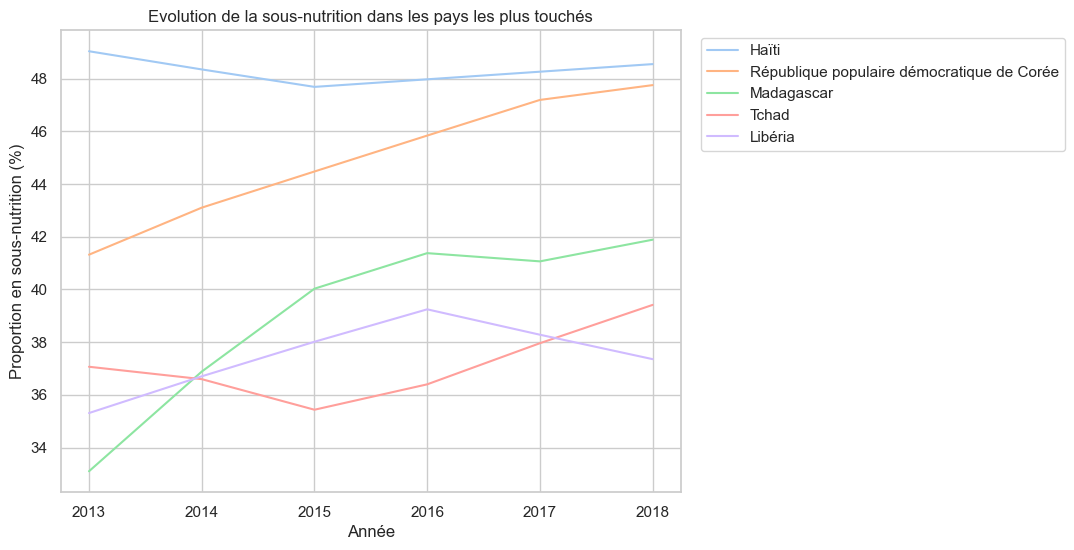

In [42]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Iterate over the top 5 countries and plot their data
for pays in top_5:
    # filter data for the current country
    pays_data = evolutionTop5[evolutionTop5['Zone'] == pays]
    
    # plot the data for the current country
    ax.plot(pays_data['Année'], pays_data['Proportion (%)'], label=pays)

# Add labels and legend
ax.set_xlabel('Année')
ax.set_ylabel('Proportion en sous-nutrition (%)')
ax.set_title('Evolution de la sous-nutrition dans les pays les plus touchés')
legend = ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.show()

Ce graphique en courbe pose plusieurs courbes questions qui peuvent êtes discutées par l'organisation et dépendent des priorité que l'on souhaite donner, en effet on peut constater que :

- **La situation en Haïti reste la plus critique en termes de proportion de la population touchée par la sous-nutrition**
- **La situation en République populaire démocratique de Corée et à Madagascar se sont aggravées ces dernières années**

### Visualisation de l'évolution du nombre de personne en sous-nutrition

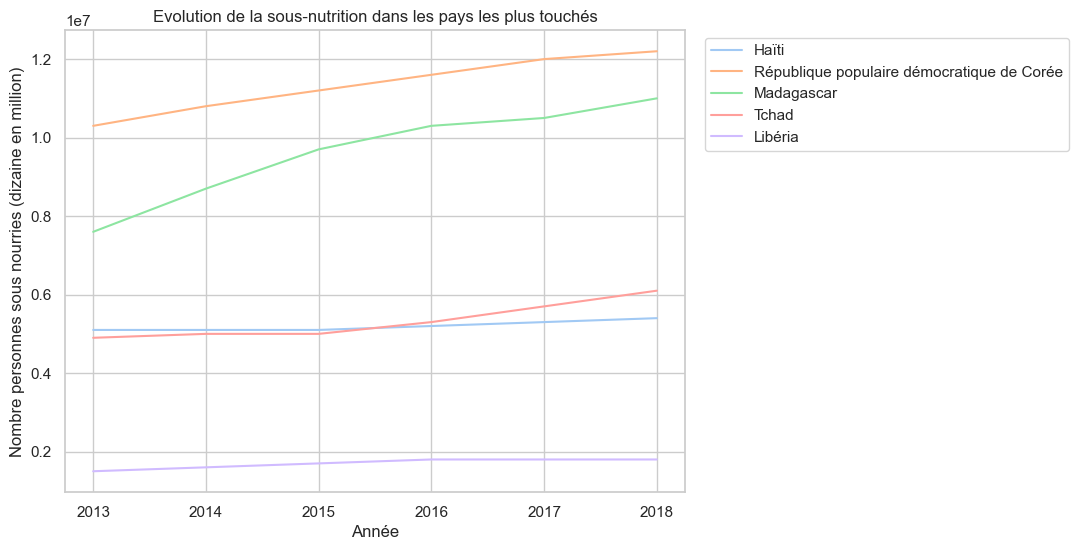

In [43]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8,6))

# Iterate over the top 5 countries and plot their data
for pays in top_5:
    # filter data for the current country
    pays_data = evolutionTop5[evolutionTop5['Zone'] == pays]
    
    # plot the data for the current country
    ax.plot(pays_data['Année'], pays_data['Nombre personnes en sous-nutrition'], label=pays)

# Add labels and legend
ax.set_xlabel('Année')
ax.set_ylabel('Nombre personnes sous nourries (dizaine en million)')
ax.set_title('Evolution de la sous-nutrition dans les pays les plus touchés')
legend = ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.show()

Ce second graphique met en évidence qu'**en termes de nombre de personnes touchées par la sous-nutrition** les deux pays à la fois **les plus touchés** mais aussi où **la situation s'est le plus aggravées** sont :

- La **République populaire démocratique de Corée**
- **Madagascar**